# Lab: Electrocardiograph
### 10.2.18   |   Jonathan Kelley   |  ISIM

In this lab, we will be using a series of amplifiers and filters to capture the electrical activity generated by heart muscle contractions. Our amplifier will be an AD623 and our filters will be a series of RC and CR combinations. 

Three electrodes placed on various parts of the body provide the necessary electrical signal to collect heart rate. The first amplifier and filter circuit is gven below:

![Filter 1 for EKG circuit](CircuitDiagram.png)

Here is our circuit:

![Our circuit](ekgcircuit.jpg)

We can see the two sets of amplifiers and filters to boost the heartrate signal and cut down on electrical noise.

#### Our bode plot looks normal indicating the frequency response of the EKG circuit:

The plot shows high signal power at low frequencies (near resting heartrate) and low power at high frequencies (noise).

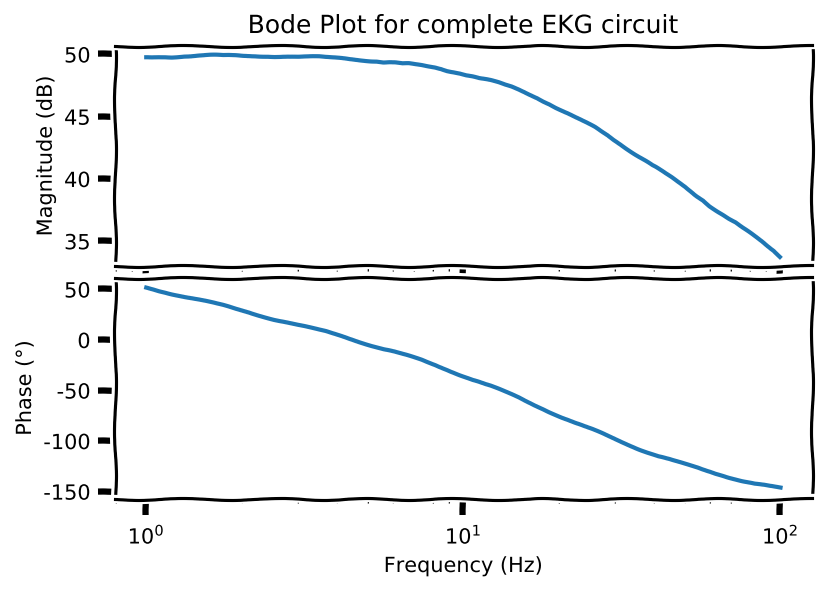

In [12]:
bode_plot()

#### And our pulse collected by our curcuit above:

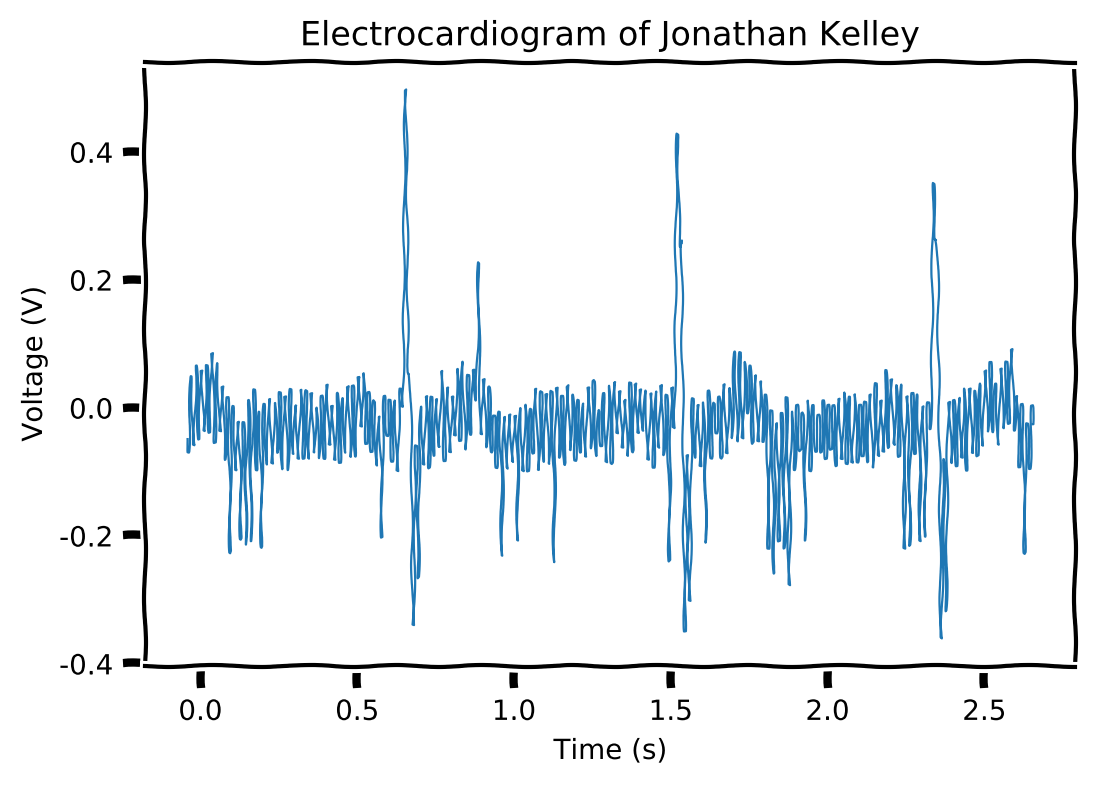

In [13]:
pulse_graph()

Our data is a bit noisy, and this was discovered to be a an artifact of the 60 Hz AC-DC converter powering the circuit not properly filtered out by the EKG circuits.

Our ekg circuit used a total of 4 filters, a low pass and high pass on the first signal filter, and two low pass on the second signal filter.

We use two AD623s with a 2k resistor setting the gain for each. The gain for each amplifier comes out to 51, so a final amplification of 2601 is used.

The cutoff frequency for each filter can be computed by 1/(R * C * 2 * pi) so 32 Hz low pass and 1.6 Hz high pass for the first set.

In [10]:
def pulse_graph():
    file = "pulse2.csv"
    data = pd.read_csv(file)#, skiprows = 9)
    plt.figure(dpi = 200)


    fin = -1000
    plt.plot((data['Time (s)']+1.5)[:fin], (data['Channel 2 (V)'])[:fin], linewidth = 0.8)

    plt.title("Electrocardiogram of Jonathan Kelley")
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")

In [11]:
def bode_plot():
    data = pd.read_csv("Bode.csv", skiprows = 20)
    w = data['Frequency (Hz)']
    magnitude = data['Channel 2 Magnitude (dB)']
    phase = data['Channel 2 Phase (°)']
    
    fig = plt.figure(dpi = 150)
    ax1 = plt.subplot(211)
    plt.semilogx(w, magnitude)    # Bode magnitude plot
    plt.title("Bode Plot for complete EKG circuit")
    plt.ylabel("Magnitude (dB)")
    
    ax2 = plt.subplot(212)
    plt.semilogx(w, phase)  # Bode phase plot
    plt.ylabel("Phase (°)")    
    plt.subplots_adjust(wspace=0, hspace=.05)
    plt.xlabel("Frequency (Hz)")
    plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.xkcd()

In [4]:
file = "pulse2.csv"
pulse = pd.read_csv(file)#, skiprows = 9)
plt.figure(dpi = 200)


#fft = np.fft.fft(data['Channel 2 (V)'])[:400]
#plt.plot(fft)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [5]:
%matplotlib inline

/home/jkelleyrtp/virtualenvs/ipython-daily/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


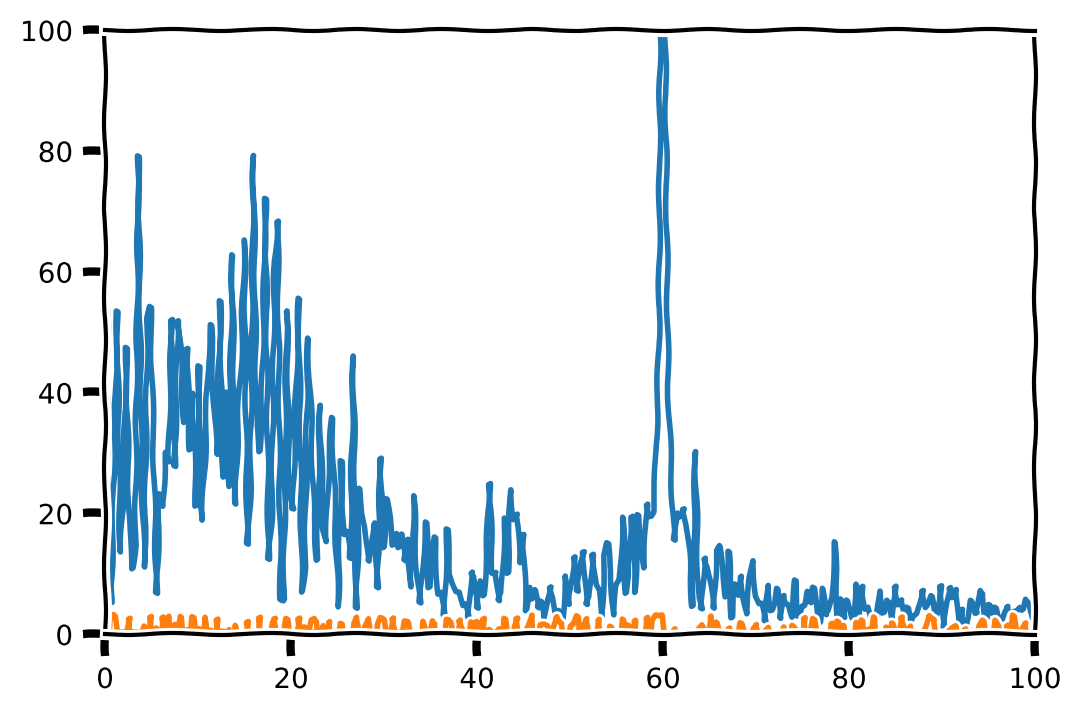

In [6]:
y = np.fft.fft(pulse['Channel 2 (V)'])
freq = np.fft.fftfreq(len(pulse['Channel 2 (V)']), pulse['Time (s)'][1] - pulse['Time (s)'][0])

plt.figure(dpi = 200)
plt.xlim((0,100))
plt.ylim((0, 100))
plt.plot(freq, np.abs(y))
plt.plot(freq, np.angle(y))

In [7]:
np.argmax(np.abs(y))

0

In [8]:
freq[4095]

1333.0078124999495